<a href="https://colab.research.google.com/github/dghwood/stockpy/blob/main/Example_Daily_Stock_Price_Data_Tiingo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np 
import datetime

In [14]:
SECRETS = !cat /content/drive/MyDrive/tiingo-api-key.txt
API_KEY = SECRETS[0]

In [49]:
def get_stock(ticker, 
              start_date = '2016-01-01', 
              end_date = datetime.datetime.now().strftime('%Y-%m-%d')):
  
  return pd.read_json(
    'https://api.tiingo.com/tiingo/daily/' + 
    '{0}/prices?startDate={1}&endDate={2}&token={3}'.format( 
        ticker, 
        start_date, 
        end_date, 
        API_KEY 
    )
  ).drop(
      columns = ['close', 'high', 'low', 'open', 'volume']
  ).rename(
      columns = {
          'adjClose': 'close',
          'adjHigh': 'high',
          'adjLow': 'low',
          'adjOpen': 'open',
          'adjVolume': 'volume'
      }
  )

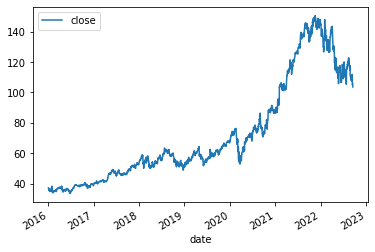

In [50]:
goog = get_stock('GOOG')
goog.plot.line(x = 'date', y = 'close')